In [1]:
import pandas as pd 
import numpy as np
data = pd.read_pickle("clean_data.pkl") 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5262 entries, 0 to 7174
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Marquage          5262 non-null   object        
 1   Famille           5262 non-null   object        
 2   Date Validité     4706 non-null   datetime64[ns]
 3   Etat              5262 non-null   object        
 4   ATELIER / ILOT    5083 non-null   object        
 5   DATE_REALISATION  4639 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 287.8+ KB


In [2]:
#palette couleurs 
colors = {
'midnight_green' : (8/255, 76/255, 97/255),

'timberwolf' : (215/255, 213/255, 216/255),

'snow' : (250/255, 240/255, 240/255),

'indian_red': (225/255, 106/255, 102/255),

'fire_brick' : (184/255, 45/255, 40/255),

'flame' : (204/255, 90/255, 41/255),

'auburn' : (153/255, 34/255, 30/255),

'saffron' : (227/255, 181/255, 5/255),

'payne_gray' : (79/255, 109/255, 122/255),

'verdigis' : (86/255, 163/255, 166/255),

'gunmetal' : (42/255, 48/255, 52/255)
}

In [3]:
#====================titre principal
def titre(ax, spine_color, facecolor, titre_wrapp, text_color):
    ax.set_xticks([])
    ax.set_yticks([])  
    for spine in ax.spines.values():
        spine.set_color(spine_color)
    ax.set_facecolor(facecolor) 
    ax.text(0.5, 0.5, #positions x, y 

        titre_wrapp,  

        fontsize=16, #taille 

        color=text_color, #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 
        
        fontweight='bold'
        )
#======================titre nv1    
def titre_nv1(ax, spine_color, facecolor, titre_wrapp, text_color):
    ax.set_xticks([])
    ax.set_yticks([])  
    for spine in ax.spines.values():
        spine.set_color(spine_color)
    ax.set_facecolor(facecolor) 
    ax.text(0.5, 0.5, #positions x, y 

        titre_wrapp,  

        fontsize=14, #taille 

        color=text_color, #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 
        
        fontweight='bold'
        )
#====================titre nv2   
def titre_nv2(ax,x,y, spine_color, facecolor, titre_wrapp, text_color):
    ax.set_xticks([])
    ax.set_yticks([])  
    for spine in ax.spines.values():
        spine.set_color(spine_color)
    ax.set_facecolor(facecolor) 
    ax.text(x, y, #positions x, y 

        titre_wrapp,  

        fontsize=12, #taille 

        color=text_color, #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 
        
        fontweight='bold'
        )

#====================zone texte    
def zone_commentaires(ax, x, y, wrapped_combo, fontsize, text_color, spine_color, facecolor, fontweight) :
    ax.text(x, y,
          wrapped_combo, #texte
          ha='left',
          va='center',
          fontsize=fontsize,
          color=text_color,
          fontweight=fontweight)
    ax.set_xticks([])
    ax.set_yticks([])  # suppresion axes
    for spine in ax.spines.values():  
        spine.set_color(spine_color) #couleur bordure
    ax.set_facecolor(facecolor) #couleur de fond

#===================tableau personnalisé    
def mon_tableau(ax, tab,
                couleur_colonnes,        # Couleur(s) pour les colonnes d’en-tête (peut être une seule ou une liste)
                fontsize,                # Taille de police des cellules
                scale_x, scale_y,        # Échelle globale du tableau
                head_fontsize,           # Taille du texte dans l’en-tête
                head_weight='bold',             # Poids du texte d’en-tête ('bold', 'normal'…)
                head_color='black',              # Couleur du texte d’en-tête
                head_facecolor='white',          # Couleur de fond de l’en-tête
                pair_facecolor='white',          # Couleur lignes paires
                impair_facecolor='white',        # Couleur lignes impaires
                text_color='black',              # Couleur du texte du corps
                text_wrapp=None,         # Largeur pour retour à la ligne automatique (None = pas de wrap)
                linewidth=1,             # Largeur lignes 
                line_color='black',      # Couleur des bordures
                alpha_bg=1.0,            # Transparence des fonds (0.0 = transparent ; 1.0 = opaque)
                align='center',          # Alignement horizontal du texte
                valign='center',         # Alignement vertical du texte
                row_height=0.1,          # Hauteur de chaque ligne
                col_ratios=None,         # Liste de ratios pour la largeur des colonnes
                col_head_color=None,     # couleur de la première colonne
                col_head_text_color = None,    #couleur texte colonne en tête
                col_pair_color=None,     #couleur des colonnes pair
                col_impair_color=None    # couleur des colonnes impairs
                
                ):        
    """
    Crée un tableau matplotlib stylisé avec options avancées de présentation.
    """

    import textwrap
    import matplotlib.colors as mcolors

    ax.axis('off')

    n_cols = len(tab.columns)

    # Création du tableau
    table = ax.table(
        cellText=tab.values,
        colLabels=tab.columns,
        loc='center',
        cellLoc=align,
        colColours=[mcolors.to_rgba(c, alpha=alpha_bg) for c in (
            couleur_colonnes if isinstance(couleur_colonnes, list) else [couleur_colonnes] * n_cols
        )]
    )

    table.auto_set_font_size(False)
    table.set_fontsize(fontsize)
    table.scale(scale_x, scale_y)

    # Application du ratio de largeur des colonnes si défini
    if col_ratios and len(col_ratios) == n_cols:
        for j in range(n_cols):
            for i in range(len(tab) + 1):  # +1 pour inclure l’en-tête
                cell = table[(i, j)]
                cell.set_width(col_ratios[j])
    
    for (i, j), cell in table.get_celld().items():
        cell.set_linewidth(linewidth)
        cell.set_edgecolor(line_color)
        cell.set_height(row_height)

        # Alignements
        cell.get_text().set_ha(align)
        cell.get_text().set_va(valign)

        if i == 0:
            # En-tête
            cell.set_facecolor(mcolors.to_rgba(head_facecolor, alpha=alpha_bg))
            cell.get_text().set_color(head_color)
            cell.get_text().set_fontweight(head_weight)
            cell.get_text().set_fontsize(head_fontsize)

            if text_wrapp:
                wrapped = textwrap.fill(cell.get_text().get_text(), width=text_wrapp)
                cell.get_text().set_text(wrapped)
        else:
            # Lignes corps
            bg_color = pair_facecolor if i % 2 == 0 else impair_facecolor
            cell.set_facecolor(mcolors.to_rgba(bg_color, alpha=alpha_bg))
            cell.get_text().set_color(text_color)

            if text_wrapp:
                wrapped = textwrap.fill(cell.get_text().get_text(), width=text_wrapp)
                cell.get_text().set_text(wrapped)
        
        # colonne entête        
        if col_head_color:
            if j == 0:
                cell.set_facecolor(col_head_color)
                cell.get_text().set_color(col_head_text_color)
        else:
            if col_pair_color:
                if j%2 == 0:
                    cell.set_facecolor(col_pair_color)
                else:
                    cell.set_facecolor(col_impair_color)
            
def personnalisation_graph(ax, title,  x_label, y_label, x_y_color,
                           face_color ='white', title_color='black'):
    ax.set_title(title, color=title_color,weight='bold') 

    ax.set_xlabel(x_label, color=x_y_color, weight='bold')  # Titre de l'axe X 

    ax.set_ylabel(y_label,color=x_y_color, weight='bold')  # Titre de l'axe Y 

    ax.set_facecolor(face_color)  # Couleur de fond 


        








In [4]:
#=============================================Champ de saisie de la date===================================================
import ipywidgets as widgets
from IPython.display import display, clear_output
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec 
import seaborn as sns
import textwrap
import ipywidgets as widgets
from IPython.display import display, clear_output

# Widgets
date_input = widgets.Text(
    placeholder='AAAA/M/J ou AAAA-MM-JJ',
    description='Date :',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)

button_valider = widgets.Button(
    description="Valider la date",
    button_style='success'
)

output = widgets.Output()

# Variable pour stocker la date au format datetime
date_de_reference = None

def traiter_donnees(date_de_reference):
    #=====================================================Etape 1: construction grille===========================================================
    #__________________________________________________________________________________________________________________________
    fig = plt.figure(figsize=(12, 40))

    # Grille principale divisée en 3 grandes zones
    gs_main = gridspec.GridSpec(nrows=6, ncols=1, height_ratios=[0.03, 0.2, 0.25, 0.25,0.11,0.06], hspace=0.1)

    #================================= zone 1: Titre ===================================================
    titre_principal = fig.add_subplot(gs_main[0, :])
    wrapped_titre = textwrap.fill("Revue de performance du département de métrologie", width=130)
    titre(titre_principal, 'white', colors['midnight_green'], wrapped_titre, 'white')

    #================================= zone 2: Indicateurs clés ========================================
    gs_zone2 = gridspec.GridSpecFromSubplotSpec(
        4, 10,
        subplot_spec=gs_main[1],
        height_ratios=[0.06,0.75,0.06,0.13],
        hspace=0.04, wspace=0.05
    )
    titre1 = fig.add_subplot(gs_zone2[0, :])
    wrapped_titre1 = textwrap.fill("Indicateurs clés", width=130)
    #(ax, spine_color, facecolor, titre_wrapp, text_color):
    titre_nv1(titre1, 'white', colors['verdigis'], wrapped_titre1,'white')

    #Indicateurs clés
    texte1 = fig.add_subplot(gs_zone2[1, :])

    #titre de la prochaine zone
    titre2 = fig.add_subplot(gs_zone2[2, :])
    wrapped_titre2 = textwrap.fill("Distribution des retards par atelier en fonction du temps de retard", width=130)
    titre_nv1(titre2, 'white', colors['verdigis'], wrapped_titre2,'white')
    #Legende
    texte2 = fig.add_subplot(gs_zone2[3, 0:2])
    texte2b = fig.add_subplot(gs_zone2[3, 2:10])
    #================================= zone 3: Distribution retards ====================================
    gs_zone3 = gridspec.GridSpecFromSubplotSpec(
        2, 6,
        subplot_spec=gs_main[2],
        height_ratios=[0.8,0.2],  # ligne 3 pour légende
        hspace=1.5, wspace=0.1
    )

    ax1=fig.add_subplot(gs_zone3[0,:])
    texte2c = fig.add_subplot(gs_zone3[1, :])


    #================================= zone 4: Distribution etats ======================================
    gs_zone4 = gridspec.GridSpecFromSubplotSpec(
        3, 6,
        subplot_spec=gs_main[3],
        height_ratios=[0.06,0.74,0.2],  
        hspace=0.25, wspace=2
    )
    titre3 = fig.add_subplot(gs_zone4[0, :])
    wrapped_titre3 = textwrap.fill("Statuts des équipements immobilisés mais actifs", width=130)
    titre_nv1(titre3, 'white', colors['verdigis'], wrapped_titre3,'white')

    ax2=fig.add_subplot(gs_zone4[1,:])
    texte3 = fig.add_subplot(gs_zone4[2, :])



    #================================= zone 5: Equipements perdus ======================================
    gs_zone5 = gridspec.GridSpecFromSubplotSpec(
        3, 6,
        subplot_spec=gs_main[4],
        height_ratios=[0.1,0.6,0.3],  
        hspace=0.08, wspace=2
    )
    titre4 = fig.add_subplot(gs_zone5[0, :])
    wrapped_titre4 = textwrap.fill("Statuts des équipements sans date de validité", width=130)
    titre_nv1(titre4, 'white', colors['verdigis'], wrapped_titre4,'white')

    tableau=fig.add_subplot(gs_zone5[1,:])
    texte4 = fig.add_subplot(gs_zone5[2, :])


    #================================= zone 6: Conclusion ==============================================
    gs_zone6 = gridspec.GridSpecFromSubplotSpec(
        2, 6,
        subplot_spec=gs_main[5],
        height_ratios=[0.15,0.85],  
        hspace=0.07, wspace=2
    )

    titre5 = fig.add_subplot(gs_zone6[0, :])
    wrapped_titre5 = textwrap.fill("  À retenir", width=130)
    titre_nv1(titre5, 'white', colors['verdigis'], wrapped_titre5,'white')

    texte5 = fig.add_subplot(gs_zone6[1, :])
    #=====================================================Etape 2: Mise en place éléments===========================================================
    #__________________________________________________________________________________________________________________________
    #___________________________________________________________________________________________________
    #==========================zone 2: Indicateurs clès=================================================

    #zone_commentaires(ax, x, y, wrapped_combo, fontsize, text_color, spine_color, facecolor, fontweight)

    #_________________________________colonne 1 : indicateurs
    moyens_en_service_ind = textwrap.fill("Moyens en service (N1): ", width=20)
    moyens_actifs_ind = textwrap.fill("Moyens actifs (N2): ", width=20)
    retards_ind = textwrap.fill("Total de retards (N3): ", width=20)
    taux_service_ind = textwrap.fill("Taux de service (N1/N2): ", width=20)
    taux_retard_ind = textwrap.fill("Taux de retard (N3/N2): ", width=20)
    temps_retard_moy_ind = textwrap.fill("Temps de retard moyen (en semaines): ", width=20)
    nbr_etalonnages_ind = textwrap.fill("Nombre d'étalonnages (dans le mois): ", width=20)

    #_________________________________colonne 2: def
    moyens_en_service_def = textwrap.fill("Il s'agit de tous les moyens disponnibles à l'utilisation: en service, en service réduit ou en prêt.", width=73)
    moyens_actifs_def = textwrap.fill("Il s'agit les moyens en service plus les moyens immobilisés temporairement : en attente, en étalonnage, en réparation et en anomalie.", width=73)
    retards_def = textwrap.fill("""Il s'agit des équipements dont la data de validité de l'étalonnage est dépassée et en service, en étalonnage,
        en attente, sous anomalie, en prêt ou en réparation""", width=73)
    taux_service_def = textwrap.fill("Nombre de moyens en service divisé par les nombre de moyens actifs", width=73)
    taux_retard_def = textwrap.fill("Nombre d'équipements en retard sur le nombre de moyens actifs", width=73)
    temps_retard_moy_def = textwrap.fill("Calcule le temps de retard moyen des équipements en service à la fin du mois analysé", width=73)
    nbr_etalonnages_def = textwrap.fill("Nombre d'étalonnages réalisés au cours du mois analysé", width=73)

    #_________________________________colonne 3 : valeurs 
    filtre_en_service=data['Etat'].isin(['EN SERVICE','EN SERVICE REDUIT','EN PRET'])
    filtre_comtage_retards=data['Etat'].isin(['EN SERVICE', 'EN ETAL/VERIF EXT',
       'EN ETAL/VERIF INT', 'ATTENTE DISPONIBILITE', 'EN SERVICE REDUIT', 'SOUS ANOMALIE', 
       'EN PRET', 'EN REPARATION EXT']) & data['Date Validité'].notna()

    moyens_en_service=data.loc[filtre_en_service]['Marquage'].count()

    moyens_actifs=data.loc[data['Etat'].isin([
        "ATTENTE SERVICE", 
        "ATTENTE UTILISATION", 
        "ATTENTE VERIF SITE",
        "ATTENTE DISPONIBILITE",
        "EN ETAL/VERIF EXT",
        "EN ETAL/VERIF INT",
        "EN PRET",
        "EN QUARANTAINE",
        "EN REPARATION EXT",
        "EN REPARATION INT",
        "EN RETOUR D'ETAL/VERIF EXT",
        "EN RETOUR D'ETAL/VERIF INT",
        "EN RETOUR REPARATION EXT",
        "EN RETOUR REPARATION INT",
        "EN SERVICE",
        "EN SERVICE REDUIT",
        "SOUS ANOMALIE",
        "EN ATTENTE CLOTURE ANOMALIE",
                                          ])]['Marquage'].count()

    taux_service=round(moyens_en_service/moyens_actifs, 2)

    nbr_retards=data.loc[(data['Date Validité']<date_de_reference)&(filtre_comtage_retards)]['Marquage'].count()

    taux_retard=round(nbr_retards/moyens_en_service, 2)

    #retard moyen
    data["Retard"]=date_de_reference-data['Date Validité']
    retard_moyen=data.loc[(data["Retard"] > pd.Timedelta(0))&(data['Date Validité'].notna())&(filtre_comtage_retards)]['Retard'].mean()
    retard_moyen_en_semaines = round(retard_moyen / pd.Timedelta(weeks=1))

    nbr_etalonnages = data[
        (data['DATE_REALISATION'].dt.year == date_de_reference.year) &
        (data['DATE_REALISATION'].dt.month == date_de_reference.month-1)
    ]['DATE_REALISATION'].count()



    #_______________________________________construction du df
    indicateurs= [moyens_en_service_ind, moyens_actifs_ind, retards_ind, taux_service_ind, taux_retard_ind, temps_retard_moy_ind, nbr_etalonnages_ind]
    indicateurs_def=[moyens_en_service_def, moyens_actifs_def, retards_def, taux_service_def, taux_retard_def, temps_retard_moy_def, nbr_etalonnages_def]
    valeurs=[moyens_en_service, moyens_actifs, nbr_retards, taux_service, taux_retard, retard_moyen_en_semaines, nbr_etalonnages ]
    tab_zone2 = pd.DataFrame({'Indicateurs':indicateurs, 'Définition':indicateurs_def, 'Valeurs':valeurs}) 




    mon_tableau(ax=texte1, tab=tab_zone2, 
            couleur_colonnes='white',fontsize= 10, scale_x=1,scale_y= 2, 
            head_fontsize=11, head_color= colors['gunmetal'], 
            text_color=colors['gunmetal'],
            linewidth=1, line_color=colors['timberwolf'], 
            align='left', row_height=0.12, 
            col_ratios=[0.2,0.7,0.1], col_head_text_color='white',
            col_head_color=colors['payne_gray'], col_pair_color=colors['payne_gray'], col_impair_color=colors['snow'] )

    #_______________________________________________________________________________________________________________________
    #==========================zone 3: Distribution des retards par atelier=================================================
    #(ax,x,y, spine_color, facecolor, titre_wrapp, text_color)
    #titre
    note=textwrap.fill("Note: ", width=35)
    titre_nv2(texte2, 0.5,0.5,'white',colors['saffron'], note, colors['gunmetal'] )


    #legende
    rtdi=textwrap.fill("RTDI: Hydraulique RTDI + Banc RTDI + Essais RTDI ", width=90)
    moyens_essais=textwrap.fill("MOYENS ESSAIS: Moyens d'essais + Projects moyens d'essais", width=90)
    expertise_procedes=textwrap.fill("EXPERTISE PROCEDES: Expertise + Matériaux et procédés", width=90)

    noteb=rtdi+'\n\n'+moyens_essais+'\n\n'+expertise_procedes
    #(ax, x, y, wrapped_combo, fontsize, text_color, spine_color, facecolor, fontweight)
    zone_commentaires(texte2b, 0.02, 0.5, noteb, 8, colors['gunmetal'], 'white', colors['timberwolf'], 'normal')

    #créer la classe de retards 1mois, 2 mois, 3 mois, >3mois
    retard_jours = data['Retard'].dt.days
    labels=['<1 mois', '1 à 2 mois', '2 à 3 mois', '>3mois']
    bins = [-1, 30, 60, 90, float('inf')]
    data['Classe Retard'] = pd.cut(retard_jours, bins=bins, labels=labels)

    #histogramme
    data_repartition_retards=data.loc[filtre_comtage_retards]
    #fusionner les ateliers RTDI, Moyens essais et expertise procedes
    # Fonction de regroupement et normalisation
    def regrouper_ateliers(val):
        if val is None:
            return 'INCONNU'
    
        val = val.upper()  # met tout en capitales
    
        if val in ["MOYENS D'ESSAIS", "PROJETS MOYENS D'ESSAIS"]:
            return "MOYENS D'ESSAIS"
        elif val in ['BANC RTDI', 'ESSAI RTDI', 'HYDRAULIQUE RTDI']:
            return 'RTDI'
        elif val in ['EXPERTISES', 'MATERIAUX & PROCÉDÉS']:
            return 'EXPERTISE ET PROCÉDÉS'
        else:
            return val
    data_repartition_retards['ATELIER REGROUPE'] = data_repartition_retards['ATELIER / ILOT'].apply(regrouper_ateliers)
    palette_retards = {
        '>3mois': colors['auburn'],
        '2 à 3 mois': colors['flame'],
        '1 à 2 mois': colors['indian_red'],
        '<1 mois': colors['saffron']
    }

    #creation table pivot
    pivot_tab = (
        data_repartition_retards
        .groupby(["ATELIER REGROUPE", "Classe Retard"])
        .size()
        .unstack(fill_value=0)
    )

    #rajout du total pour le tri des barres
    pivot_tab["Total"] = pivot_tab.sum(axis=1)
    pivot_tab = pivot_tab.sort_values(by="Total", ascending=False)

    #remise au format long
    df_melted = pivot_tab.drop(columns="Total").reset_index().melt(
        id_vars="ATELIER REGROUPE",
        var_name="Classe Retard",
        value_name="Nombre de retards"
    )

    #tracé
    # Initialisation du "bas de pile"
    bottom = np.zeros(len(pivot_tab))

    # Pour chaque classe de retard, on empile les barres
    for classe in ['>3mois', '2 à 3 mois', '1 à 2 mois', '<1 mois']:
        valeurs = df_melted[df_melted["Classe Retard"] == classe]["Nombre de retards"].values
        bars = ax1.bar(
            pivot_tab.index,
            valeurs,
            bottom=bottom,
            label=classe,
            color=palette_retards[classe],
            edgecolor=colors["snow"]
        )

        #  Ajout des étiquettes
        for bar, val in zip(bars, valeurs):
            if val > 0:
                ax1.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2,
                    str(int(val)),
                    ha='center',
                    va='center',
                    fontsize=9,
                    color=colors['gunmetal']
                )

        bottom += valeurs


    ax1.legend(title="Classe Retard")

    #personnalisation_graph(ax, title,  x_label, y_label, x_y_color, face_color ='white', title_color='black')
    personnalisation_graph(ax1, "Distribution des retards par atelier", "Atelier", "Nombre de retards",
                       x_y_color=colors['payne_gray'], face_color=colors['timberwolf'], title_color=colors['midnight_green'])

    ax1.grid(True, #affichage grille 

           axis='y', #axe y uniquemet ('both' si on veut les deux) 

           which='major', 

           linewidth=0.2, 

           color=colors['verdigis']) 

    ax1.tick_params(axis='both', #petits traits de l'exe 

                  labelcolor=colors['midnight_green'], #couleur valeurs 

                  color=colors['verdigis'],
                  
                  rotation= -90)


    for spine in ax1.spines.values():  # couleur bordures 

        spine.set_color(colors['verdigis']) 
    #_______________________________________________________________________________________________________        
    #==========================zone 4: Immobilisés par état=================================================

    palette_etat={'ATTENTE  SERVICE': colors['midnight_green'],
                'ATTENTE UTILISATION': colors['timberwolf'] , 
                'ATTENTE VERIF SITE': colors['snow'], 
                'ATTENTE DISPONIBILITE': colors['indian_red'] ,
                'EN ETAL/VERIF EXT': colors['verdigis'], 
                'EN ETAL/VERIF INT': colors['saffron'],
                'EN PRET': colors['payne_gray'], 
                'EN QUARANTAINE': (127/255, 94/255, 171/255) ,
                'EN REPARATION EXT':(73/255, 193/255, 165/255) ,
                'SOUS ANOMALIE': colors['auburn'],
                "EN RETOUR D'ETAL/VERIF EXT": (147/255, 197/255, 114/255),
                "EN RETOUR D'ETAL/VERIF IN" : (205/255, 178/255, 128/255)}

    filtre_equipement_immobilises = (data['Etat'].isin(['ATTENTE  SERVICE', 'ATTENTE UTILISATION', 'ATTENTE VERIF SITE', 'ATTENTE DISPONIBILITE',
    'EN ETAL/VERIF EXT', 'EN ETAL/VERIF INT', 'EN PRET', 'EN QUARANTAINE', 'EN REPARATION EXT', 
    'SOUS ANOMALIE', "EN RETOUR D'ETAL/VERIF EXT", "EN RETOUR D'ETAL/VERIF IN"])) & data['Date Validité'].notna()

    equipement_immo = data.loc[filtre_equipement_immobilises]
    effectifs = equipement_immo["Etat"].value_counts()
    modalites = effectifs.index # l'index de effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = ["Etat"]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"]= round(tab["n"]/tab["n"].sum(), 1)


    ax2.pie(
        tab["n"],
        labels=tab["Etat"],
        colors=[palette_etat[etat] for etat in tab["Etat"]],
        autopct="%1.1f%%",
        startangle=90
    )

    #==========================zone 5: Date de validité vide par état=================================================
    #création tableau
    validite_na_etat=data.loc[
        (data['Date Validité'].isna()) & (data['Etat'].isin([
       'EN SERVICE', 'EN ETAL/VERIF EXT', 'EN ETAL/VERIF INT', 'ATTENTE DISPONIBILITE', 'EN SERVICE REDUIT', 
       'SOUS ANOMALIE', 'EN PRET', 'EN REPARATION EXT']))
    ].groupby('Etat')['Famille'].count().reset_index()

    validite_na_etat.sort_values(by='Famille',ascending=False, inplace=True)
    validite_na_etat.rename(columns={'Famille': 'Nombre'}, inplace=True)

    tableau.set_xticks([])
    tableau.set_yticks([])
    for spine in tableau.spines.values():  
        spine.set_color(None) #couleur bordure

    #cellText = [[str(val)] for val in validite_na_etat.values]

    table = tableau.table(
        cellText=validite_na_etat.values,
        cellLoc='right',
        colWidths=[0.3, 0.1],
        rowLoc='center',
        colLoc='center',
        loc='center',
        edges='horizontal'
    )

    table.scale(1, 1.5)

    for (i, j), cell in table.get_celld().items():
        if j == 0:  # row labels
            cell.set_facecolor(colors['midnight_green'])
        else:
            cell.set_facecolor(colors['snow'] if i % 2 == 0 else colors['indian_red'])

        cell.set_text_props(color=colors['gunmetal'], ha='center', va='center')
        cell.set_edgecolor(colors['verdigis'])

    plt.show()
    
    

# === Fonction appelée au clic sur le bouton ===
def on_valider_clicked(b):
    with output:
        clear_output()
        date_str = date_input.value.strip()
        try:
            for fmt in ("%Y/%m/%d", "%Y-%m-%d"):
                try:
                    date_de_reference = datetime.strptime(date_str, fmt)
                    print(f"✅ Date enregistrée : {date_de_reference.strftime('%Y-%m-%d')}")
                    # 🟢 Lancer le traitement ici
                    traiter_donnees(date_de_reference)
                    return
                except ValueError:
                    continue
            raise ValueError("Format invalide")
        except:
            print("⚠️ Format invalide. Utilise AAAA/M/J ou AAAA-MM-JJ (ex : 2025/4/19)")

# Connexion du bouton
button_valider.on_click(on_valider_clicked)


# Affichage dans le notebook
display(widgets.VBox([
    widgets.HTML("<h4>🗓️ Saisir la date de référence pour l’étude :</h4>"),
    date_input,
    button_valider,
    output
]))




C:\Users\mlleI\AppData\Local\Temp\ipykernel_29756\2383108999.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_repartition_retards['ATELIER REGROUPE'] = data_repartition_retards['ATELIER / ILOT'].apply(regrouper_ateliers)
C:\Users\mlleI\AppData\Local\Temp\ipykernel_29756\2383108999.py:244: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["ATELIER REGROUPE", "Classe Retard"])


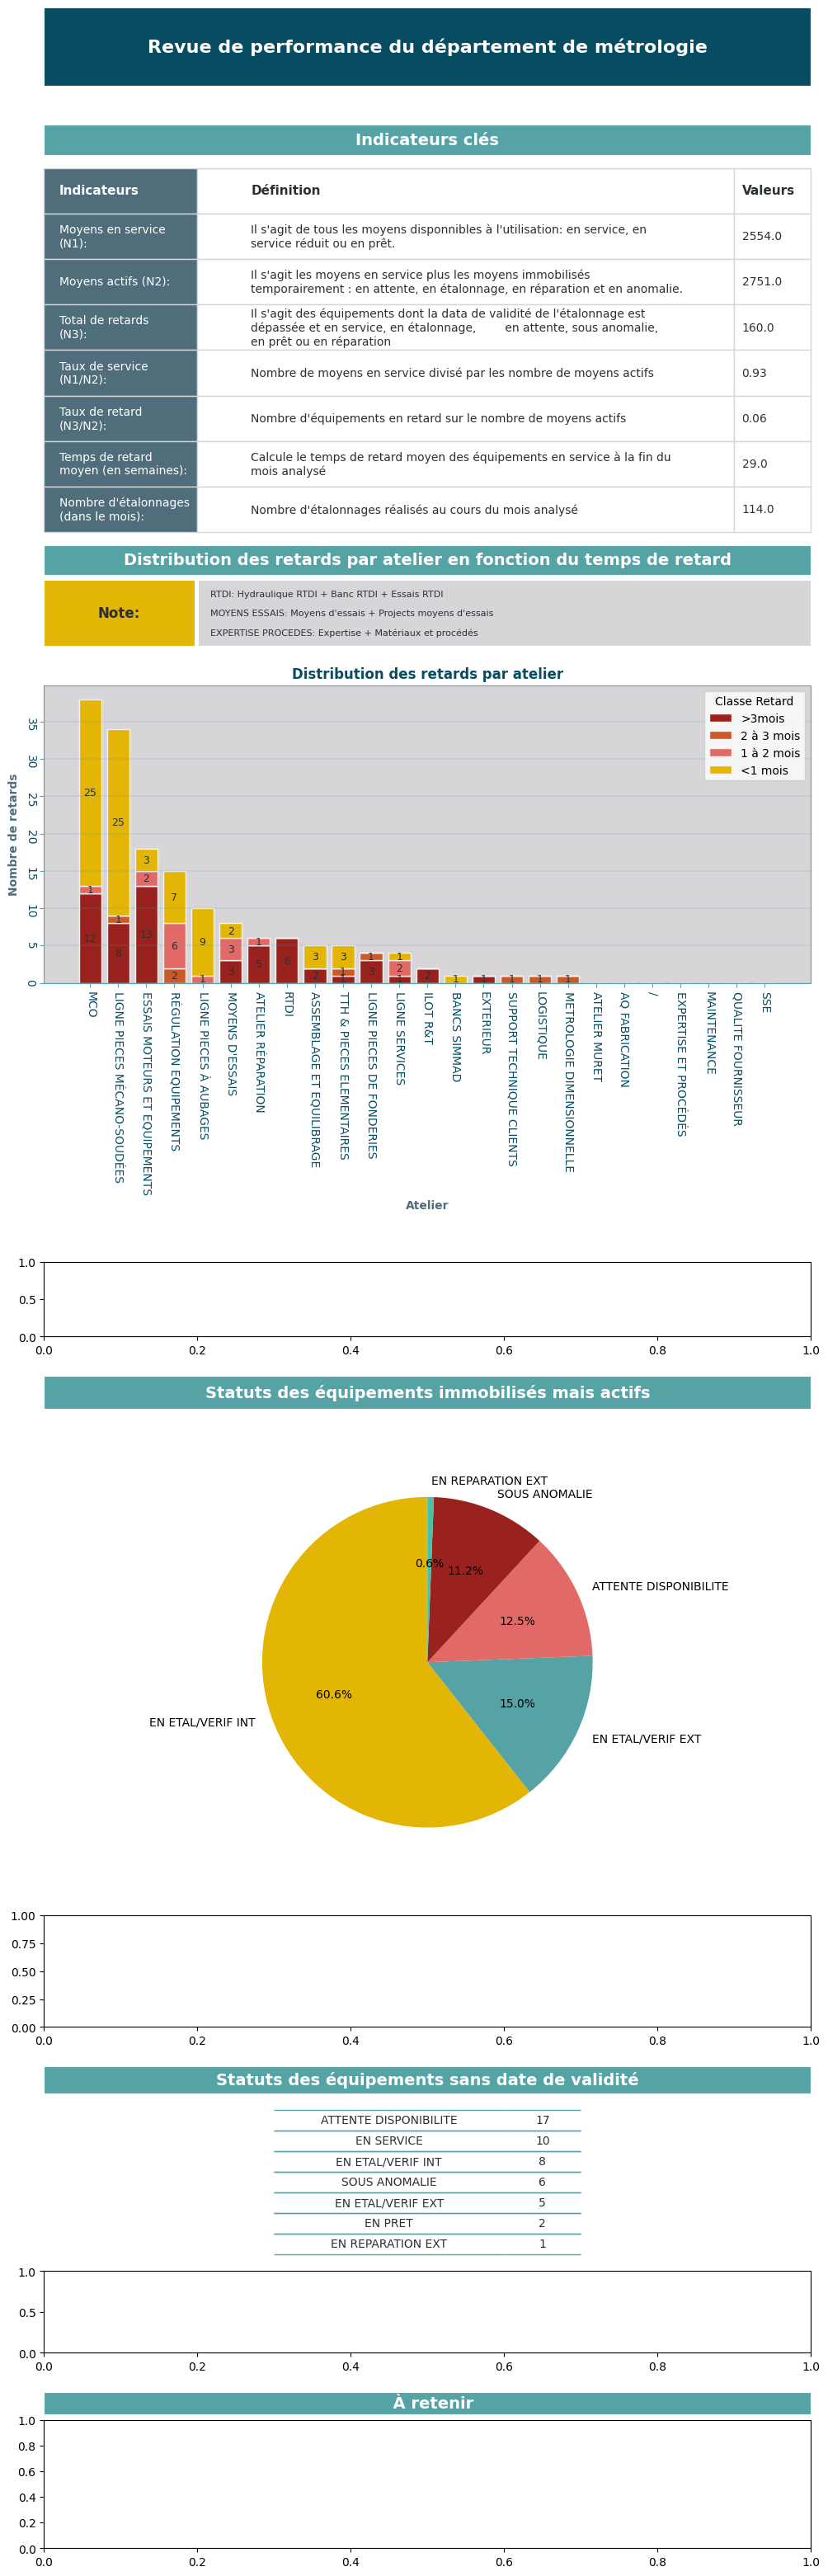

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec 
import seaborn as sns
import textwrap
import ipywidgets as widgets
from IPython.display import display, clear_output



#=====================================================Etape 1: construction grille===========================================================
#__________________________________________________________________________________________________________________________
fig = plt.figure(figsize=(12, 40))

# Grille principale divisée en 3 grandes zones
gs_main = gridspec.GridSpec(nrows=6, ncols=1, height_ratios=[0.03, 0.2, 0.25, 0.25,0.11,0.06], hspace=0.1)

#================================= zone 1: Titre ===================================================
titre_principal = fig.add_subplot(gs_main[0, :])
wrapped_titre = textwrap.fill("Revue de performance du département de métrologie", width=130)
titre(titre_principal, 'white', colors['midnight_green'], wrapped_titre, 'white')

#================================= zone 2: Indicateurs clés ========================================
gs_zone2 = gridspec.GridSpecFromSubplotSpec(
    4, 10,
    subplot_spec=gs_main[1],
    height_ratios=[0.06,0.75,0.06,0.13],
    hspace=0.04, wspace=0.05
)
titre1 = fig.add_subplot(gs_zone2[0, :])
wrapped_titre1 = textwrap.fill("Indicateurs clés", width=130)
#(ax, spine_color, facecolor, titre_wrapp, text_color):
titre_nv1(titre1, 'white', colors['verdigis'], wrapped_titre1,'white')

#Indicateurs clés
texte1 = fig.add_subplot(gs_zone2[1, :])

#titre de la prochaine zone
titre2 = fig.add_subplot(gs_zone2[2, :])
wrapped_titre2 = textwrap.fill("Distribution des retards par atelier en fonction du temps de retard", width=130)
titre_nv1(titre2, 'white', colors['verdigis'], wrapped_titre2,'white')
#Legende
texte2 = fig.add_subplot(gs_zone2[3, 0:2])
texte2b = fig.add_subplot(gs_zone2[3, 2:10])
#================================= zone 3: Distribution retards ====================================
gs_zone3 = gridspec.GridSpecFromSubplotSpec(
    2, 6,
    subplot_spec=gs_main[2],
    height_ratios=[0.8,0.2],  # ligne 3 pour légende
    hspace=1.5, wspace=0.1
)

ax1=fig.add_subplot(gs_zone3[0,:])
texte2c = fig.add_subplot(gs_zone3[1, :])


#================================= zone 4: Distribution etats ======================================
gs_zone4 = gridspec.GridSpecFromSubplotSpec(
    3, 6,
    subplot_spec=gs_main[3],
    height_ratios=[0.06,0.74,0.2],  
    hspace=0.25, wspace=2
)
titre3 = fig.add_subplot(gs_zone4[0, :])
wrapped_titre3 = textwrap.fill("Statuts des équipements immobilisés mais actifs", width=130)
titre_nv1(titre3, 'white', colors['verdigis'], wrapped_titre3,'white')

ax2=fig.add_subplot(gs_zone4[1,:])
texte3 = fig.add_subplot(gs_zone4[2, :])



#================================= zone 5: Equipements perdus ======================================
gs_zone5 = gridspec.GridSpecFromSubplotSpec(
    3, 6,
    subplot_spec=gs_main[4],
    height_ratios=[0.1,0.6,0.3],  
    hspace=0.08, wspace=2
)
titre4 = fig.add_subplot(gs_zone5[0, :])
wrapped_titre4 = textwrap.fill("Statuts des équipements sans date de validité", width=130)
titre_nv1(titre4, 'white', colors['verdigis'], wrapped_titre4,'white')

tableau=fig.add_subplot(gs_zone5[1,:])
texte4 = fig.add_subplot(gs_zone5[2, :])


#================================= zone 6: Conclusion ==============================================
gs_zone6 = gridspec.GridSpecFromSubplotSpec(
    2, 6,
    subplot_spec=gs_main[5],
    height_ratios=[0.15,0.85],  
    hspace=0.07, wspace=2
)

titre5 = fig.add_subplot(gs_zone6[0, :])
wrapped_titre5 = textwrap.fill("  À retenir", width=130)
titre_nv1(titre5, 'white', colors['verdigis'], wrapped_titre5,'white')

texte5 = fig.add_subplot(gs_zone6[1, :])
#=====================================================Etape 2: Mise en place éléments===========================================================
#__________________________________________________________________________________________________________________________
#___________________________________________________________________________________________________
#==========================zone 2: Indicateurs clès=================================================

#zone_commentaires(ax, x, y, wrapped_combo, fontsize, text_color, spine_color, facecolor, fontweight)

#_________________________________colonne 1 : indicateurs
moyens_en_service_ind = textwrap.fill("Moyens en service (N1): ", width=20)
moyens_actifs_ind = textwrap.fill("Moyens actifs (N2): ", width=20)
retards_ind = textwrap.fill("Total de retards (N3): ", width=20)
taux_service_ind = textwrap.fill("Taux de service (N1/N2): ", width=20)
taux_retard_ind = textwrap.fill("Taux de retard (N3/N2): ", width=20)
temps_retard_moy_ind = textwrap.fill("Temps de retard moyen (en semaines): ", width=20)
nbr_etalonnages_ind = textwrap.fill("Nombre d'étalonnages (dans le mois): ", width=20)

#_________________________________colonne 2: def
moyens_en_service_def = textwrap.fill("Il s'agit de tous les moyens disponnibles à l'utilisation: en service, en service réduit ou en prêt.", width=73)
moyens_actifs_def = textwrap.fill("Il s'agit les moyens en service plus les moyens immobilisés temporairement : en attente, en étalonnage, en réparation et en anomalie.", width=73)
retards_def = textwrap.fill("""Il s'agit des équipements dont la data de validité de l'étalonnage est dépassée et en service, en étalonnage,
       en attente, sous anomalie, en prêt ou en réparation""", width=73)
taux_service_def = textwrap.fill("Nombre de moyens en service divisé par les nombre de moyens actifs", width=73)
taux_retard_def = textwrap.fill("Nombre d'équipements en retard sur le nombre de moyens actifs", width=73)
temps_retard_moy_def = textwrap.fill("Calcule le temps de retard moyen des équipements en service à la fin du mois analysé", width=73)
nbr_etalonnages_def = textwrap.fill("Nombre d'étalonnages réalisés au cours du mois analysé", width=73)

#_________________________________colonne 3 : valeurs 
filtre_en_service=data['Etat'].isin(['EN SERVICE','EN SERVICE REDUIT','EN PRET'])
filtre_comtage_retards=data['Etat'].isin(['EN SERVICE', 'EN ETAL/VERIF EXT',
       'EN ETAL/VERIF INT', 'ATTENTE DISPONIBILITE', 'EN SERVICE REDUIT', 'SOUS ANOMALIE', 
       'EN PRET', 'EN REPARATION EXT']) & data['Date Validité'].notna()

moyens_en_service=data.loc[filtre_en_service]['Marquage'].count()

moyens_actifs=data.loc[data['Etat'].isin([
    "ATTENTE SERVICE", 
    "ATTENTE UTILISATION", 
    "ATTENTE VERIF SITE",
    "ATTENTE DISPONIBILITE",
    "EN ETAL/VERIF EXT",
    "EN ETAL/VERIF INT",
    "EN PRET",
    "EN QUARANTAINE",
    "EN REPARATION EXT",
    "EN REPARATION INT",
    "EN RETOUR D'ETAL/VERIF EXT",
    "EN RETOUR D'ETAL/VERIF INT",
    "EN RETOUR REPARATION EXT",
    "EN RETOUR REPARATION INT",
    "EN SERVICE",
    "EN SERVICE REDUIT",
    "SOUS ANOMALIE",
    "EN ATTENTE CLOTURE ANOMALIE",
                                          ])]['Marquage'].count()

taux_service=round(moyens_en_service/moyens_actifs, 2)

nbr_retards=data.loc[(data['Date Validité']<date_de_reference)&(filtre_comtage_retards)]['Marquage'].count()

taux_retard=round(nbr_retards/moyens_en_service, 2)

#retard moyen
data["Retard"]=date_de_reference-data['Date Validité']
retard_moyen=data.loc[(data["Retard"] > pd.Timedelta(0))&(data['Date Validité'].notna())&(filtre_comtage_retards)]['Retard'].mean()
retard_moyen_en_semaines = round(retard_moyen / pd.Timedelta(weeks=1))

nbr_etalonnages = data[
    (data['DATE_REALISATION'].dt.year == date_de_reference.year) &
    (data['DATE_REALISATION'].dt.month == date_de_reference.month-1)
]['DATE_REALISATION'].count()



#_______________________________________construction du df
indicateurs= [moyens_en_service_ind, moyens_actifs_ind, retards_ind, taux_service_ind, taux_retard_ind, temps_retard_moy_ind, nbr_etalonnages_ind]
indicateurs_def=[moyens_en_service_def, moyens_actifs_def, retards_def, taux_service_def, taux_retard_def, temps_retard_moy_def, nbr_etalonnages_def]
valeurs=[moyens_en_service, moyens_actifs, nbr_retards, taux_service, taux_retard, retard_moyen_en_semaines, nbr_etalonnages ]
tab_zone2 = pd.DataFrame({'Indicateurs':indicateurs, 'Définition':indicateurs_def, 'Valeurs':valeurs}) 




mon_tableau(ax=texte1, tab=tab_zone2, 
            couleur_colonnes='white',fontsize= 10, scale_x=1,scale_y= 2, 
            head_fontsize=11, head_color= colors['gunmetal'], 
            text_color=colors['gunmetal'],
            linewidth=1, line_color=colors['timberwolf'], 
            align='left', row_height=0.12, 
            col_ratios=[0.2,0.7,0.1], col_head_text_color='white',
            col_head_color=colors['payne_gray'], col_pair_color=colors['payne_gray'], col_impair_color=colors['snow'] )

#_______________________________________________________________________________________________________________________
#==========================zone 3: Distribution des retards par atelier=================================================
#(ax,x,y, spine_color, facecolor, titre_wrapp, text_color)
#titre
note=textwrap.fill("Note: ", width=35)
titre_nv2(texte2, 0.5,0.5,'white',colors['saffron'], note, colors['gunmetal'] )


#legende
rtdi=textwrap.fill("RTDI: Hydraulique RTDI + Banc RTDI + Essais RTDI ", width=90)
moyens_essais=textwrap.fill("MOYENS ESSAIS: Moyens d'essais + Projects moyens d'essais", width=90)
expertise_procedes=textwrap.fill("EXPERTISE PROCEDES: Expertise + Matériaux et procédés", width=90)

noteb=rtdi+'\n\n'+moyens_essais+'\n\n'+expertise_procedes
#(ax, x, y, wrapped_combo, fontsize, text_color, spine_color, facecolor, fontweight)
zone_commentaires(texte2b, 0.02, 0.5, noteb, 8, colors['gunmetal'], 'white', colors['timberwolf'], 'normal')

#créer la classe de retards 1mois, 2 mois, 3 mois, >3mois
retard_jours = data['Retard'].dt.days
labels=['<1 mois', '1 à 2 mois', '2 à 3 mois', '>3mois']
bins = [-1, 30, 60, 90, float('inf')]
data['Classe Retard'] = pd.cut(retard_jours, bins=bins, labels=labels)

#histogramme
data_repartition_retards=data.loc[filtre_comtage_retards]
#fusionner les ateliers RTDI, Moyens essais et expertise procedes
# Fonction de regroupement et normalisation
def regrouper_ateliers(val):
    if val is None:
        return 'INCONNU'
    
    val = val.upper()  # met tout en capitales
    
    if val in ["MOYENS D'ESSAIS", "PROJETS MOYENS D'ESSAIS"]:
        return "MOYENS D'ESSAIS"
    elif val in ['BANC RTDI', 'ESSAI RTDI', 'HYDRAULIQUE RTDI']:
        return 'RTDI'
    elif val in ['EXPERTISES', 'MATERIAUX & PROCÉDÉS']:
        return 'EXPERTISE ET PROCÉDÉS'
    else:
        return val
data_repartition_retards['ATELIER REGROUPE'] = data_repartition_retards['ATELIER / ILOT'].apply(regrouper_ateliers)
palette_retards = {
    '>3mois': colors['auburn'],
    '2 à 3 mois': colors['flame'],
    '1 à 2 mois': colors['indian_red'],
    '<1 mois': colors['saffron']
}

#creation table pivot
pivot_tab = (
    data_repartition_retards
    .groupby(["ATELIER REGROUPE", "Classe Retard"])
    .size()
    .unstack(fill_value=0)
)

#rajout du total pour le tri des barres
pivot_tab["Total"] = pivot_tab.sum(axis=1)
pivot_tab = pivot_tab.sort_values(by="Total", ascending=False)

#remise au format long
df_melted = pivot_tab.drop(columns="Total").reset_index().melt(
    id_vars="ATELIER REGROUPE",
    var_name="Classe Retard",
    value_name="Nombre de retards"
)

#tracé
# Initialisation du "bas de pile"
bottom = np.zeros(len(pivot_tab))

# Pour chaque classe de retard, on empile les barres
for classe in ['>3mois', '2 à 3 mois', '1 à 2 mois', '<1 mois']:
    valeurs = df_melted[df_melted["Classe Retard"] == classe]["Nombre de retards"].values
    bars = ax1.bar(
        pivot_tab.index,
        valeurs,
        bottom=bottom,
        label=classe,
        color=palette_retards[classe],
        edgecolor=colors["snow"]
    )

    #  Ajout des étiquettes
    for bar, val in zip(bars, valeurs):
        if val > 0:
            ax1.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                str(int(val)),
                ha='center',
                va='center',
                fontsize=9,
                color=colors['gunmetal']
            )

    bottom += valeurs


ax1.legend(title="Classe Retard")

#personnalisation_graph(ax, title,  x_label, y_label, x_y_color, face_color ='white', title_color='black')
personnalisation_graph(ax1, "Distribution des retards par atelier", "Atelier", "Nombre de retards",
                       x_y_color=colors['payne_gray'], face_color=colors['timberwolf'], title_color=colors['midnight_green'])

ax1.grid(True, #affichage grille 

           axis='y', #axe y uniquemet ('both' si on veut les deux) 

           which='major', 

           linewidth=0.2, 

           color=colors['verdigis']) 

ax1.tick_params(axis='both', #petits traits de l'exe 

                  labelcolor=colors['midnight_green'], #couleur valeurs 

                  color=colors['verdigis'],
                  
                  rotation= -90)


for spine in ax1.spines.values():  # couleur bordures 

        spine.set_color(colors['verdigis']) 
#_______________________________________________________________________________________________________        
#==========================zone 4: Immobilisés par état=================================================

palette_etat={'ATTENTE  SERVICE': colors['midnight_green'],
              'ATTENTE UTILISATION': colors['timberwolf'] , 
              'ATTENTE VERIF SITE': colors['snow'], 
              'ATTENTE DISPONIBILITE': colors['indian_red'] ,
              'EN ETAL/VERIF EXT': colors['verdigis'], 
              'EN ETAL/VERIF INT': colors['saffron'],
              'EN PRET': colors['payne_gray'], 
              'EN QUARANTAINE': (127/255, 94/255, 171/255) ,
              'EN REPARATION EXT':(73/255, 193/255, 165/255) ,
              'SOUS ANOMALIE': colors['auburn'],
              "EN RETOUR D'ETAL/VERIF EXT": (147/255, 197/255, 114/255),
              "EN RETOUR D'ETAL/VERIF IN" : (205/255, 178/255, 128/255)}

filtre_equipement_immobilises = (data['Etat'].isin(['ATTENTE  SERVICE', 'ATTENTE UTILISATION', 'ATTENTE VERIF SITE', 'ATTENTE DISPONIBILITE',
'EN ETAL/VERIF EXT', 'EN ETAL/VERIF INT', 'EN PRET', 'EN QUARANTAINE', 'EN REPARATION EXT', 
'SOUS ANOMALIE', "EN RETOUR D'ETAL/VERIF EXT", "EN RETOUR D'ETAL/VERIF IN"])) & data['Date Validité'].notna()

equipement_immo = data.loc[filtre_equipement_immobilises]
effectifs = equipement_immo["Etat"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["Etat"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"]= round(tab["n"]/tab["n"].sum(), 1)


ax2.pie(
    tab["n"],
    labels=tab["Etat"],
    colors=[palette_etat[etat] for etat in tab["Etat"]],
    autopct="%1.1f%%",
    startangle=90
)

#==========================zone 5: Date de validité vide par état=================================================
#création tableau
validite_na_etat=data.loc[
    (data['Date Validité'].isna()) & (data['Etat'].isin([
       'EN SERVICE', 'EN ETAL/VERIF EXT', 'EN ETAL/VERIF INT', 'ATTENTE DISPONIBILITE', 'EN SERVICE REDUIT', 
       'SOUS ANOMALIE', 'EN PRET', 'EN REPARATION EXT']))
].groupby('Etat')['Famille'].count().reset_index()

validite_na_etat.sort_values(by='Famille',ascending=False, inplace=True)
validite_na_etat.rename(columns={'Famille': 'Nombre'}, inplace=True)

tableau.set_xticks([])
tableau.set_yticks([])
for spine in tableau.spines.values():  
        spine.set_color(None) #couleur bordure

#cellText = [[str(val)] for val in validite_na_etat.values]

table = tableau.table(
    cellText=validite_na_etat.values,
    cellLoc='right',
    colWidths=[0.3, 0.1],
    rowLoc='center',
    colLoc='center',
    loc='center',
    edges='horizontal'
)

table.scale(1, 1.5)

for (i, j), cell in table.get_celld().items():
    if j == 0:  # row labels
        cell.set_facecolor(colors['midnight_green'])
    else:
        cell.set_facecolor(colors['snow'] if i % 2 == 0 else colors['indian_red'])

    cell.set_text_props(color=colors['gunmetal'], ha='center', va='center')
    cell.set_edgecolor(colors['verdigis'])

plt.show()





In [1]:
import matplotlib.pyplot as plt
print("Styles disponibles :", plt.style.available)
print("Style courant : axes.facecolor =", plt.rcParams['axes.facecolor'])


Styles disponibles : ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Style courant : axes.facecolor = white
